###  Problem Statement:

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone. 

target column = Rings

In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import joblib

In [179]:
url ='https://github.com/dsrscientist/dataset1/blob/master/abalone.csv?raw=true'

df = pd.read_csv(url)

In [180]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [129]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

### Observation

1. There are no null values

In [130]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Class=15, n=103 (2.466%)
Class=7, n=391 (9.361%)
Class=9, n=689 (16.495%)
Class=10, n=634 (15.178%)
Class=8, n=568 (13.598%)
Class=20, n=26 (0.622%)
Class=16, n=67 (1.604%)
Class=19, n=32 (0.766%)
Class=14, n=126 (3.017%)
Class=11, n=487 (11.659%)
Class=12, n=267 (6.392%)
Class=18, n=42 (1.006%)
Class=13, n=203 (4.860%)
Class=5, n=115 (2.753%)
Class=4, n=57 (1.365%)
Class=6, n=259 (6.201%)
Class=21, n=14 (0.335%)
Class=17, n=58 (1.389%)
Class=22, n=6 (0.144%)
Class=1, n=1 (0.024%)
Class=3, n=15 (0.359%)
Class=26, n=1 (0.024%)
Class=23, n=9 (0.215%)
Class=29, n=1 (0.024%)
Class=2, n=1 (0.024%)
Class=27, n=2 (0.048%)
Class=25, n=1 (0.024%)
Class=24, n=2 (0.048%)


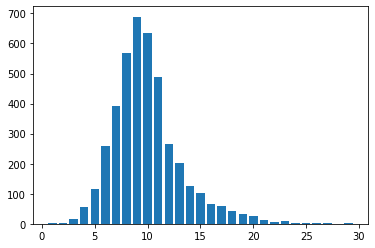

In [131]:

y= df['Rings']
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

    
plt.bar(counter.keys(), counter.values())
plt.show()

### Observation

1. We can observe a class imbalance between the classes in the target dataset, need to balance it.
2. Cannot balance with smote or near miss as there are some classes which only have 1 value in it and it follows normal distribution

In [132]:
pd.crosstab(df['Sex'],df['Rings'])

Rings,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,29
Sex,,,,,,,,,,,,,,,,,,,,,
F,0,0,0,0,4,16,44,122,238,248,...,15,12,7,3,6,1,1,0,1,1
I,1,1,12,51,100,216,267,274,173,92,...,2,2,1,0,0,0,0,0,0,0
M,0,0,3,6,11,27,80,172,278,294,...,15,12,6,3,3,1,0,1,1,0


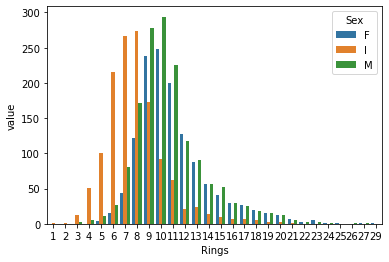

In [133]:
### getting the distribution between the Sex and rings
ct = pd.crosstab(df['Sex'],df['Rings'])

stacked = ct.stack().reset_index().rename(columns={0:'value'})

sns.barplot(x=stacked.Rings, y=stacked.value, hue=stacked.Sex)

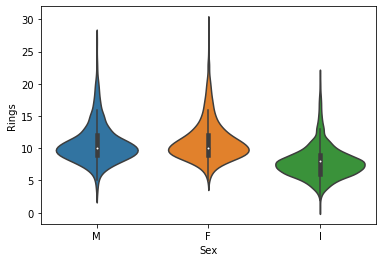

In [134]:
## distribution of rings as per the sex

sns.violinplot(x ="Sex",
             y ="Rings",
             data = df)

### Observation

1. we can observe the classes are normally distributed

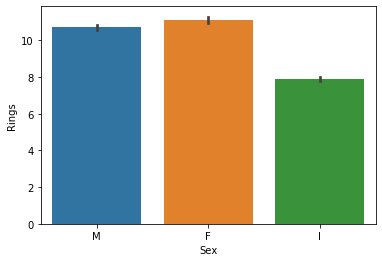

In [135]:
sns.barplot(x = 'Sex', y = 'Rings',data = df)

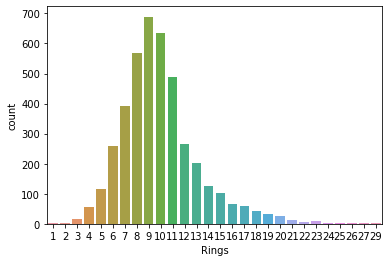

In [136]:
import seaborn as sns
sns.countplot(df['Rings'])

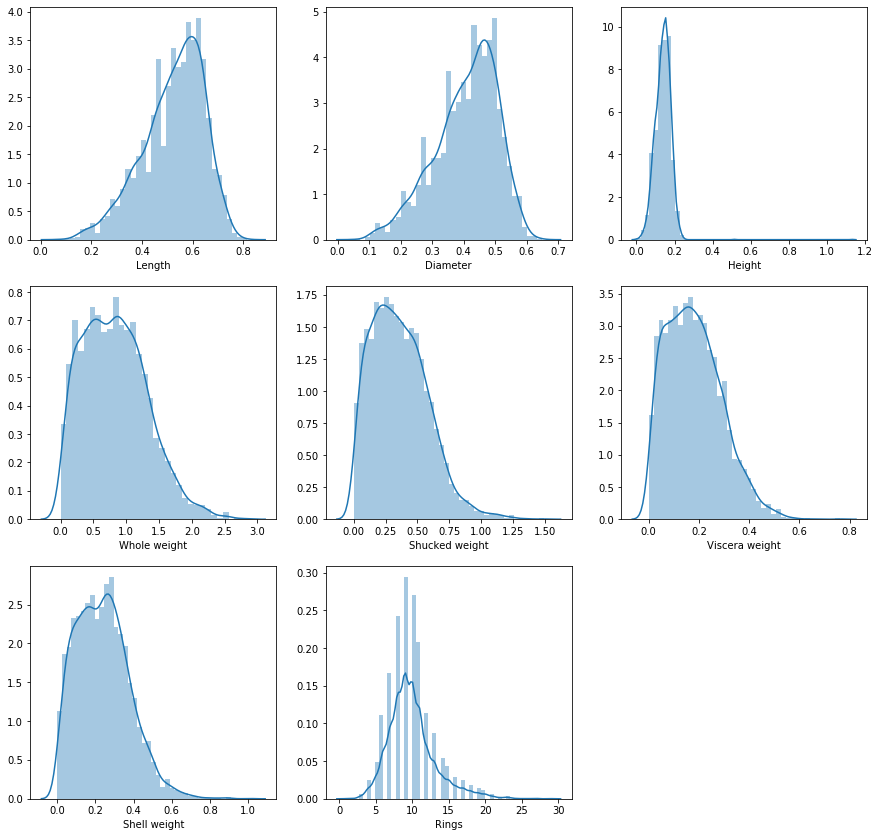

In [137]:
plt.figure(figsize= (15,30))

for i in enumerate(df._get_numeric_data().columns):
    plt.subplot(6,3,i[0] + 1)
    sns.distplot(df[i[1]])

### Observation

1. we can observe high skewness in height feature which will be later removed by power transformer

In [138]:
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

### Observation
1. we can observe skewness in the Height and Rings features

In [181]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


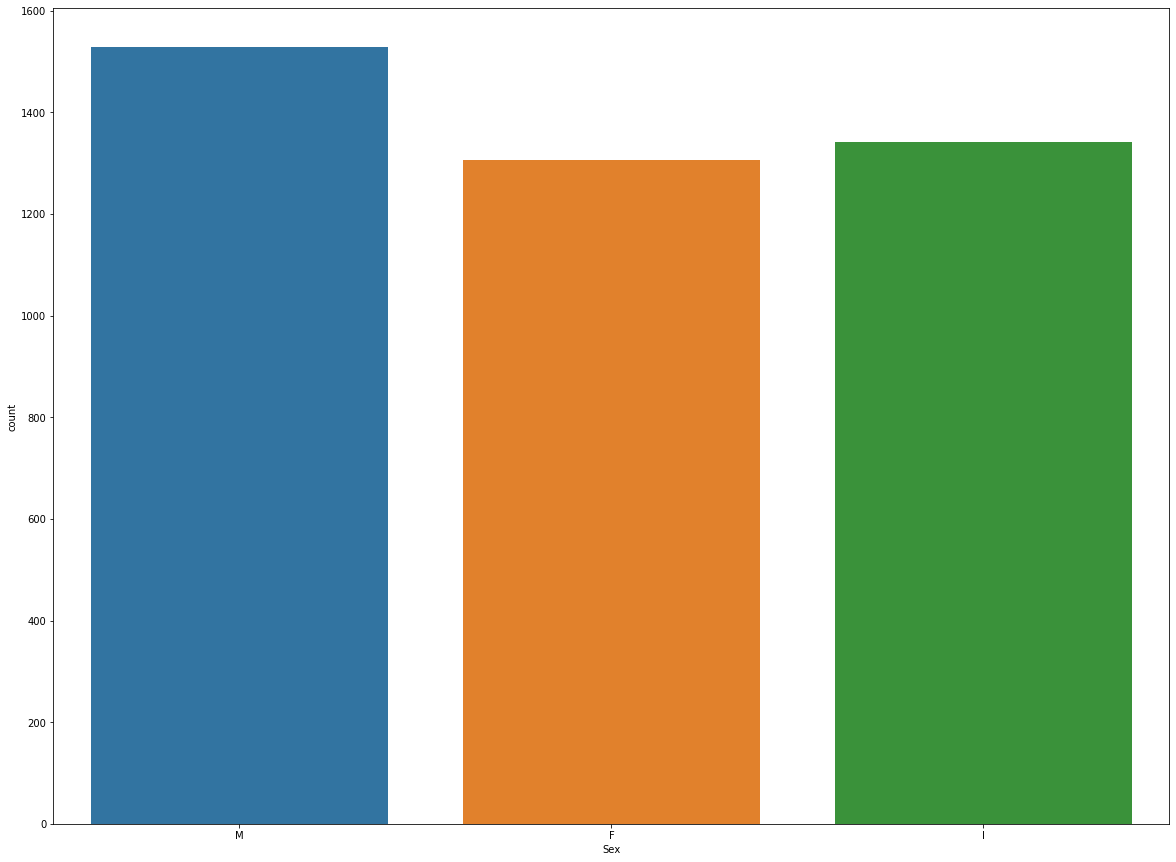

In [182]:
import matplotlib.pyplot as plt


sns.countplot(df['Sex'])

In [144]:
df.dtypes

Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

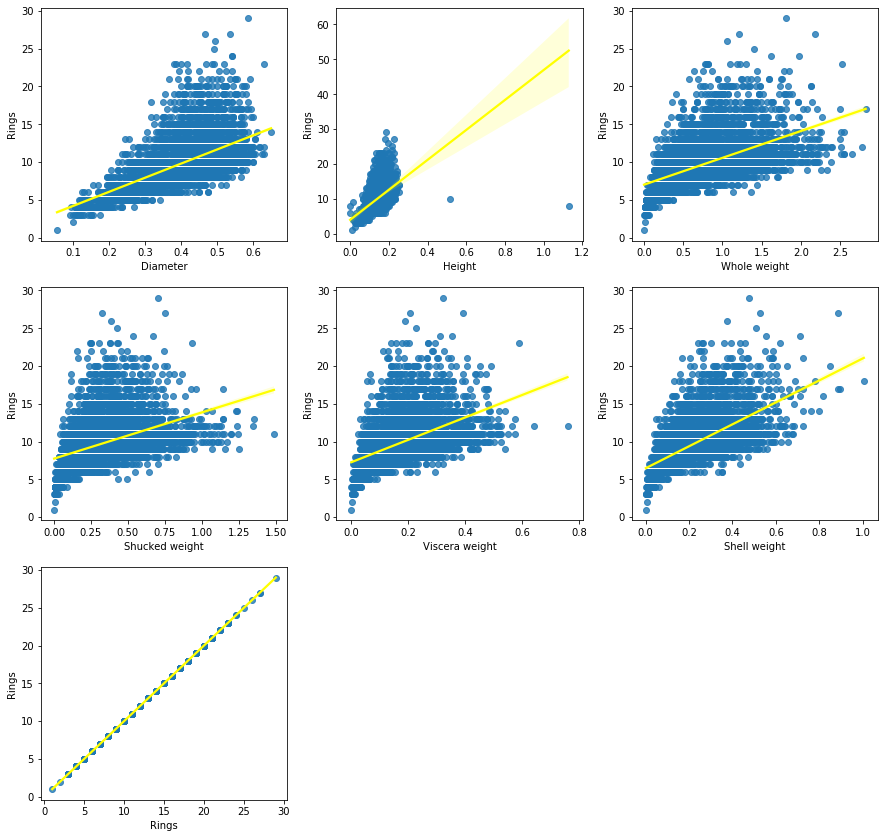

In [145]:
plt.figure(figsize= (15,30))

for i in enumerate(df.columns[1:]):
    plt.subplot(6,3,i[0] + 1)
    sns.regplot(x=i[1],y='Rings',line_kws={"color": "yellow"},data=df)

### Observation

1. Thorugh reg plot we can observe that most features have positve corelation with targer value

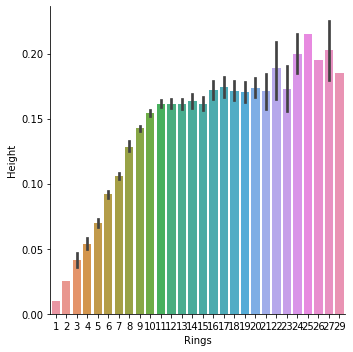

In [146]:

sns.catplot(x='Rings',y='Height',data=df,kind='bar')

#### Observation :

1. we can observer that the  number of rings is directly propotional to height 

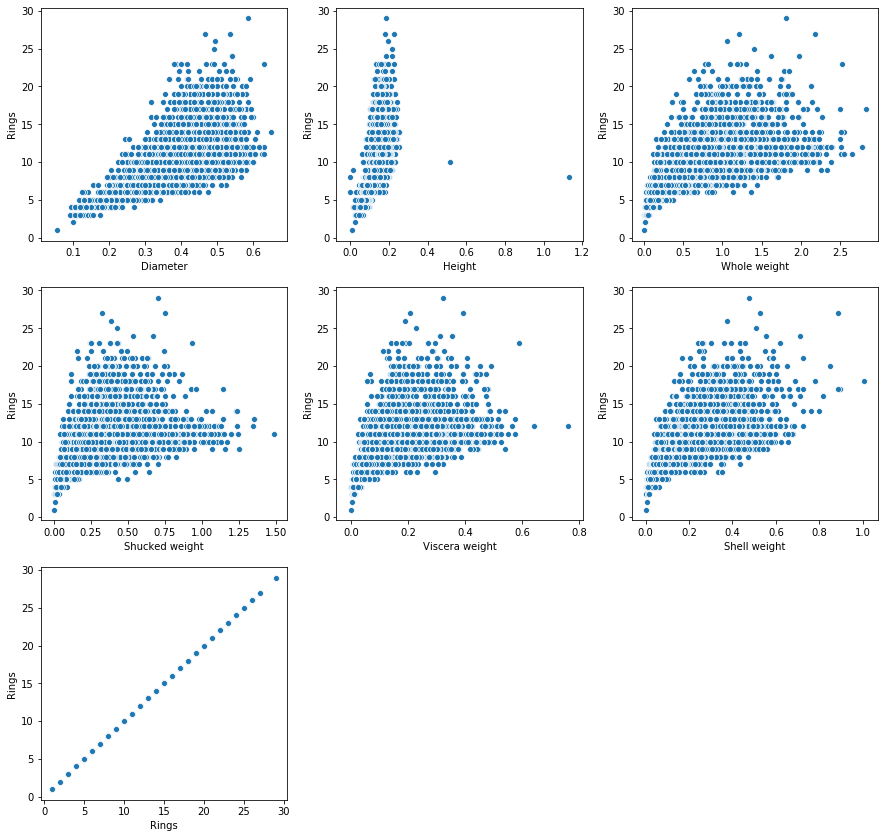

In [147]:
### scatter plot seaborn
plt.figure(figsize= (15,30))

for i in enumerate(df.columns[1:]):
    plt.subplot(6,3,i[0] + 1)
    sns.scatterplot(x=i[1],
                    y="Rings",
                    data=df)

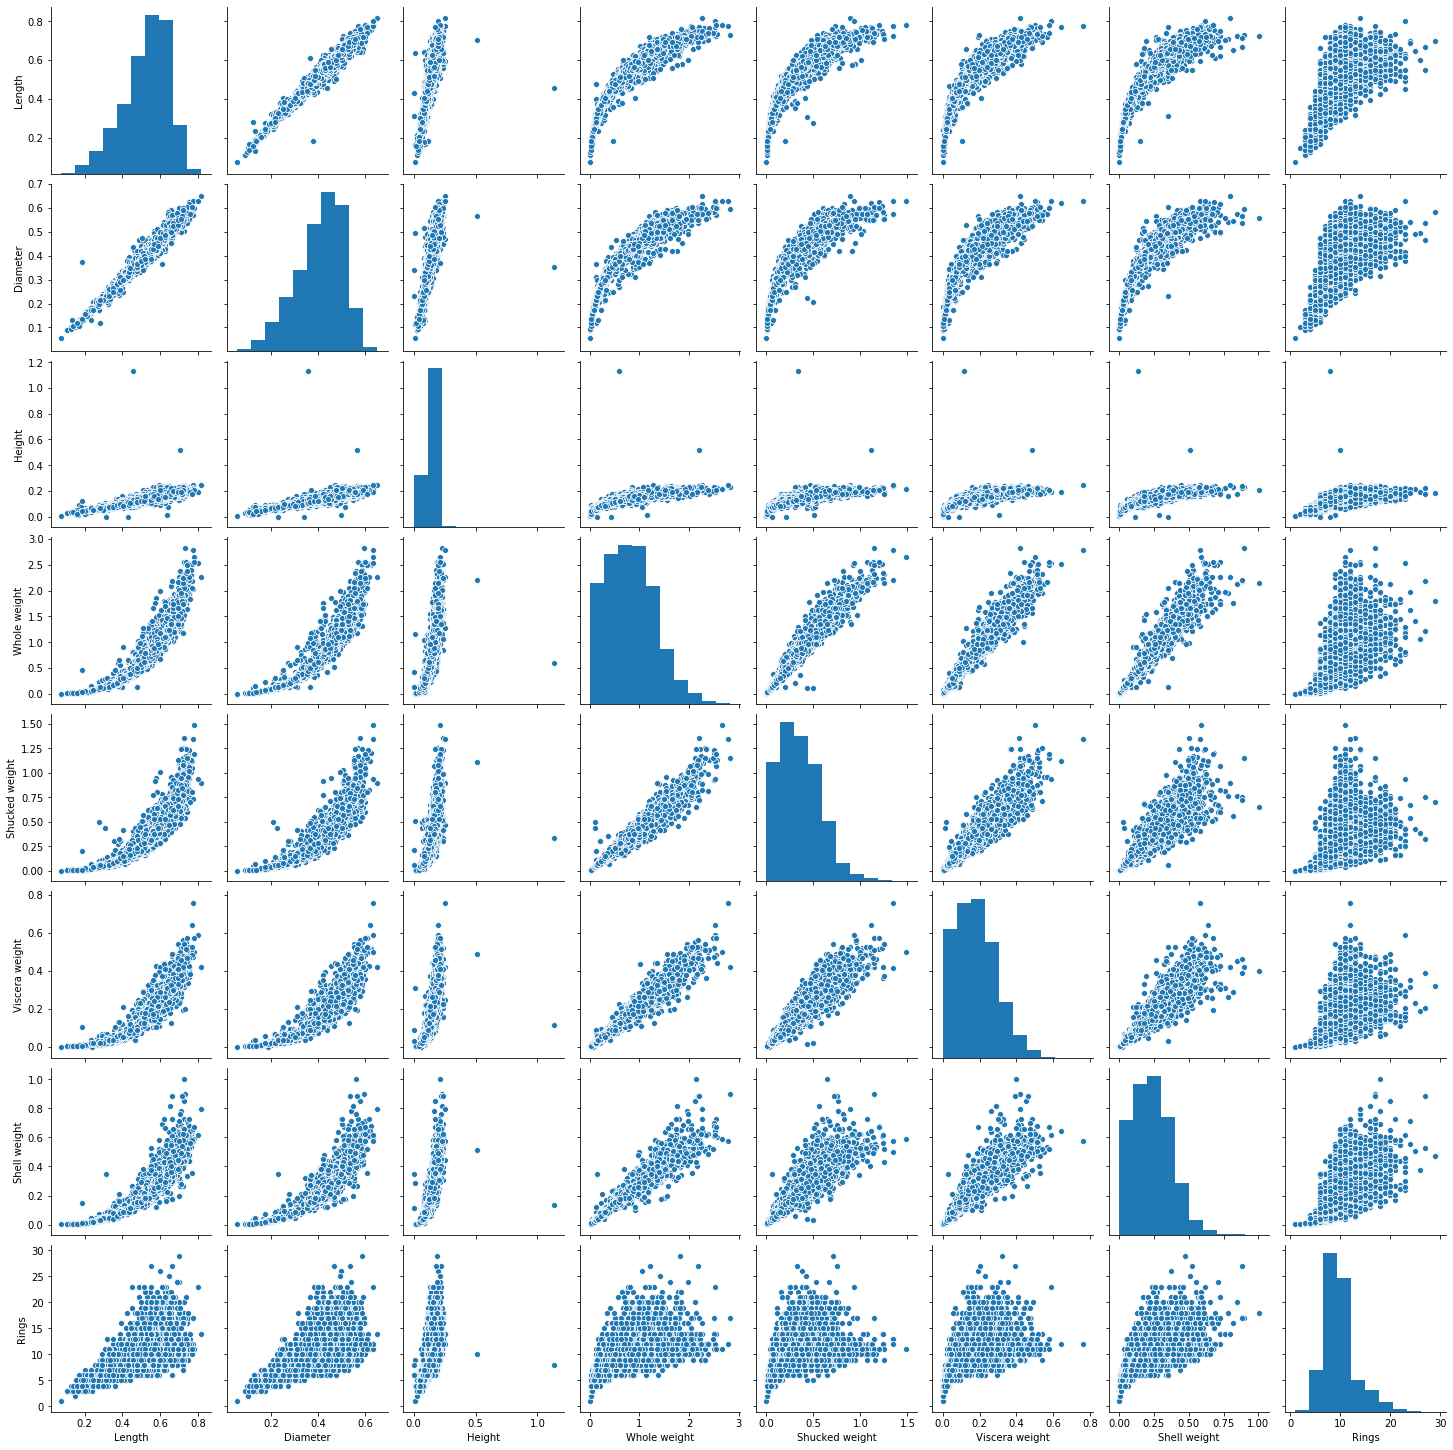

In [148]:
sns.pairplot(df)

In [183]:
## label encoding and creatin dummy values of sex column

df =pd.get_dummies(df)


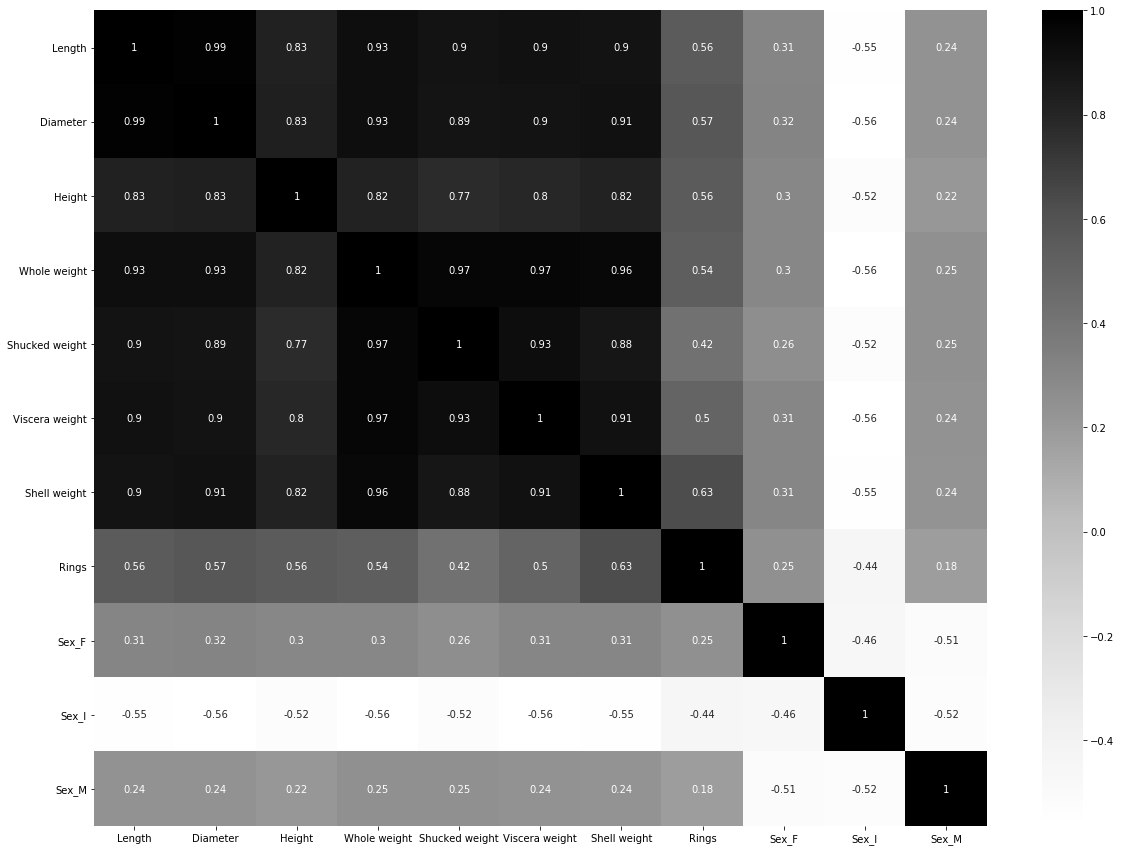

In [185]:
### checking for multicolinearity in the dataset


plt.rcParams['figure.figsize'] = (20, 15)
corr = df.corr()

sns.heatmap(corr,cmap='Greys' ,annot=True)




In [186]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,0.309666,-0.551465,0.236543
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,0.318626,-0.564315,0.240376
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,0.298421,-0.518552,0.215459
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,0.299741,-0.557592,0.252038
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,0.263991,-0.521842,0.251793
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,0.308444,-0.556081,0.242194
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,0.306319,-0.546953,0.235391
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,0.250279,-0.436063,0.181831
Sex_F,0.309666,0.318626,0.298421,0.299741,0.263991,0.308444,0.306319,0.250279,1.000000,-0.464298,-0.512528
Sex_I,-0.551465,-0.564315,-0.518552,-0.557592,-0.521842,-0.556081,-0.546953,-0.436063,-0.464298,1.000000,-0.522541


### Observation

1. we can observe that there is multicolinearity between multiple columns

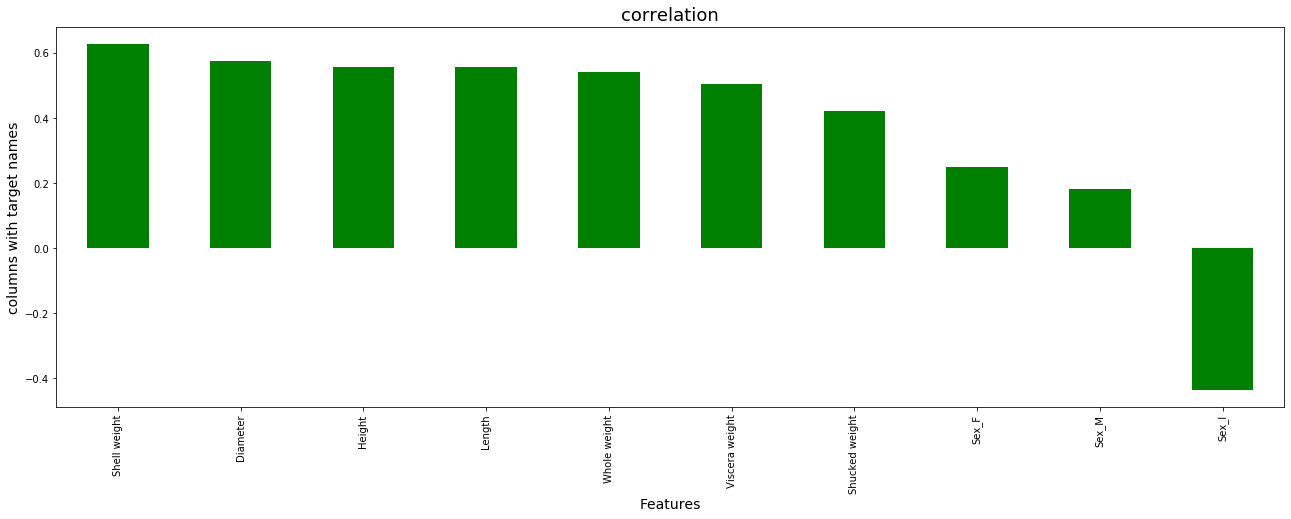

In [187]:
## to checl the positive and negative correlation

plt.figure(figsize=(22,7))
df.corr()['Rings'].sort_values(ascending=False).drop(['Rings']).plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

### Observation

1. most features have positive corellation with the target

In [188]:
### looking at variance inflaction factor to check multicolinearity

### using vif to find multicolinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

new_df = df.copy()

X = new_df.drop(columns=['Rings'])
  

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

          feature         VIF
0          Length   40.945763
1        Diameter   42.379841
2          Height    3.581369
3    Whole weight  109.768710
4  Shucked weight   28.550546
5  Viscera weight   17.445012
6    Shell weight   21.263272
7           Sex_F   23.079561
8           Sex_I   19.854572
9           Sex_M   25.751173


### Observations
1. ) We can observe multicolinearity in columns length,diameter,height,whole_weight, Shucked Weight, Viscera weightm Shell weight

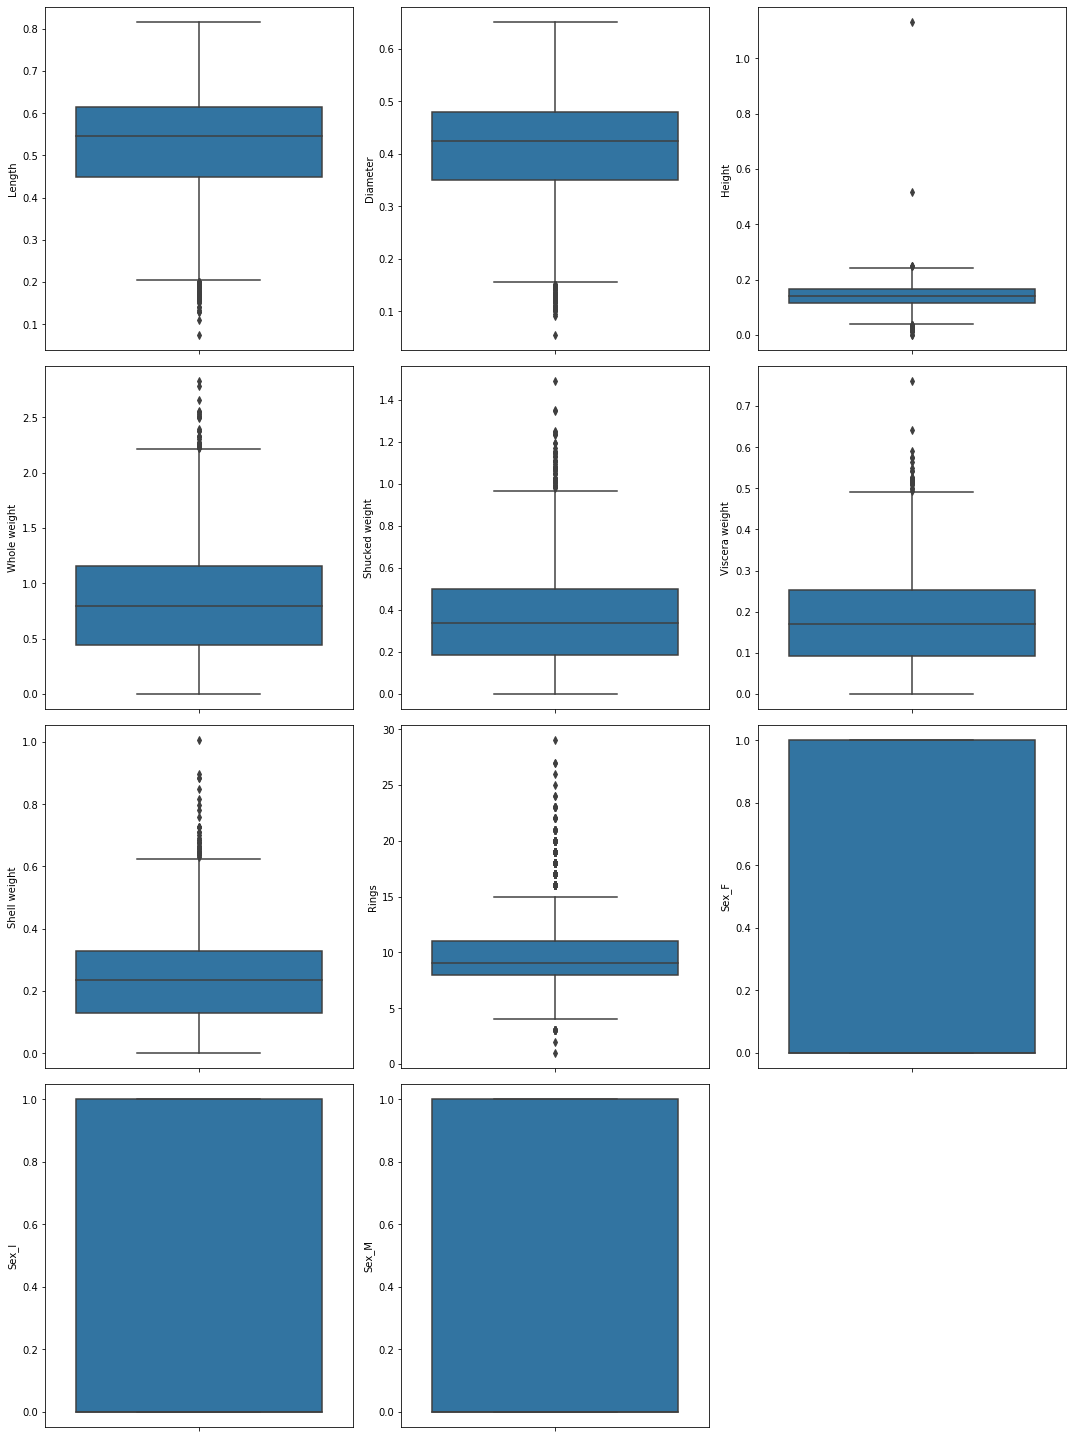

In [189]:
## checking for outliers

## box plot to check for outliers

plt.figure(figsize= (15,30))


for i,el in enumerate(df._get_numeric_data().columns):
    plt.subplot(6,3,i + 1)
    sns.boxplot(y=el,data=df)
                
                

plt.tight_layout() 

plt.show()

In [191]:
### removing outliers using zscore

from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
threshold=3
np.where(z>3)


(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
         166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
         238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
         334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
         433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
         674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
         754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
        1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
        1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
        1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
        1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
        2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
        2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
        2436, 2459, 2471, 2544, 2623, 

In [192]:
new_df =df[(z<3).all(axis=1)]

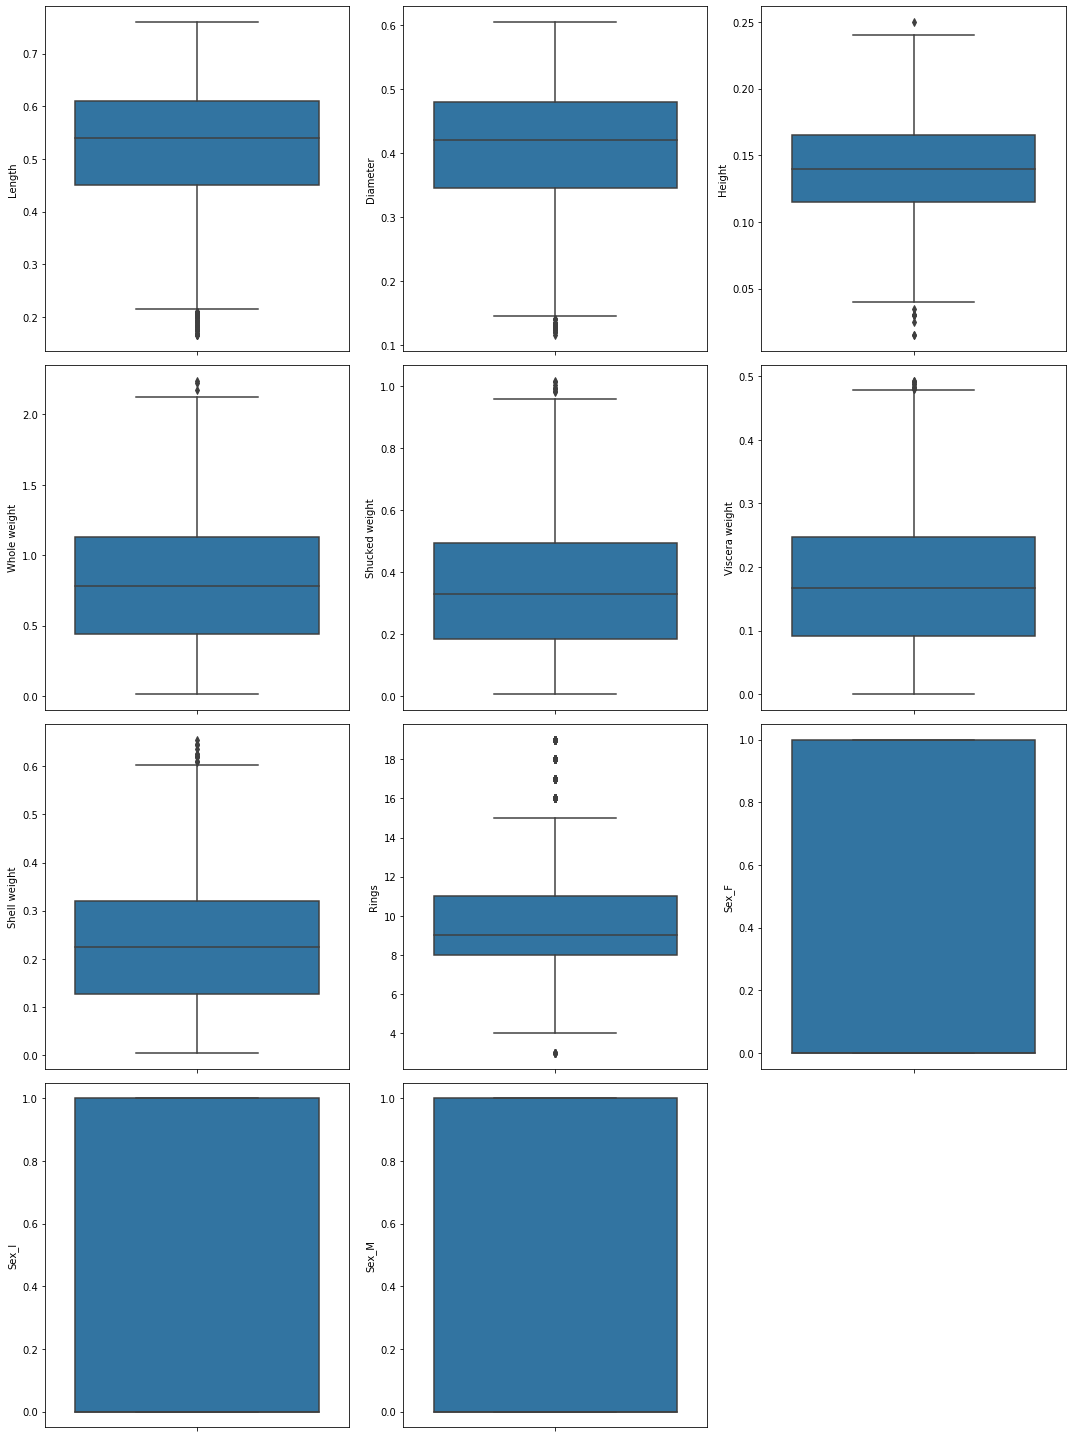

In [193]:
## checking after removing outliers using zscore

## checking for outliers

## box plot to check for outliers

plt.figure(figsize= (15,30))


for i,el in enumerate(new_df.columns):
    plt.subplot(6,3,i + 1)
    sns.boxplot(y=el,data=new_df)
                
                

plt.tight_layout() 

plt.show()

### Observation
1. we can observer still some outliers, using inter quartile range to detect and outliers

### Using IQR to remove outliers

In [194]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

new_df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

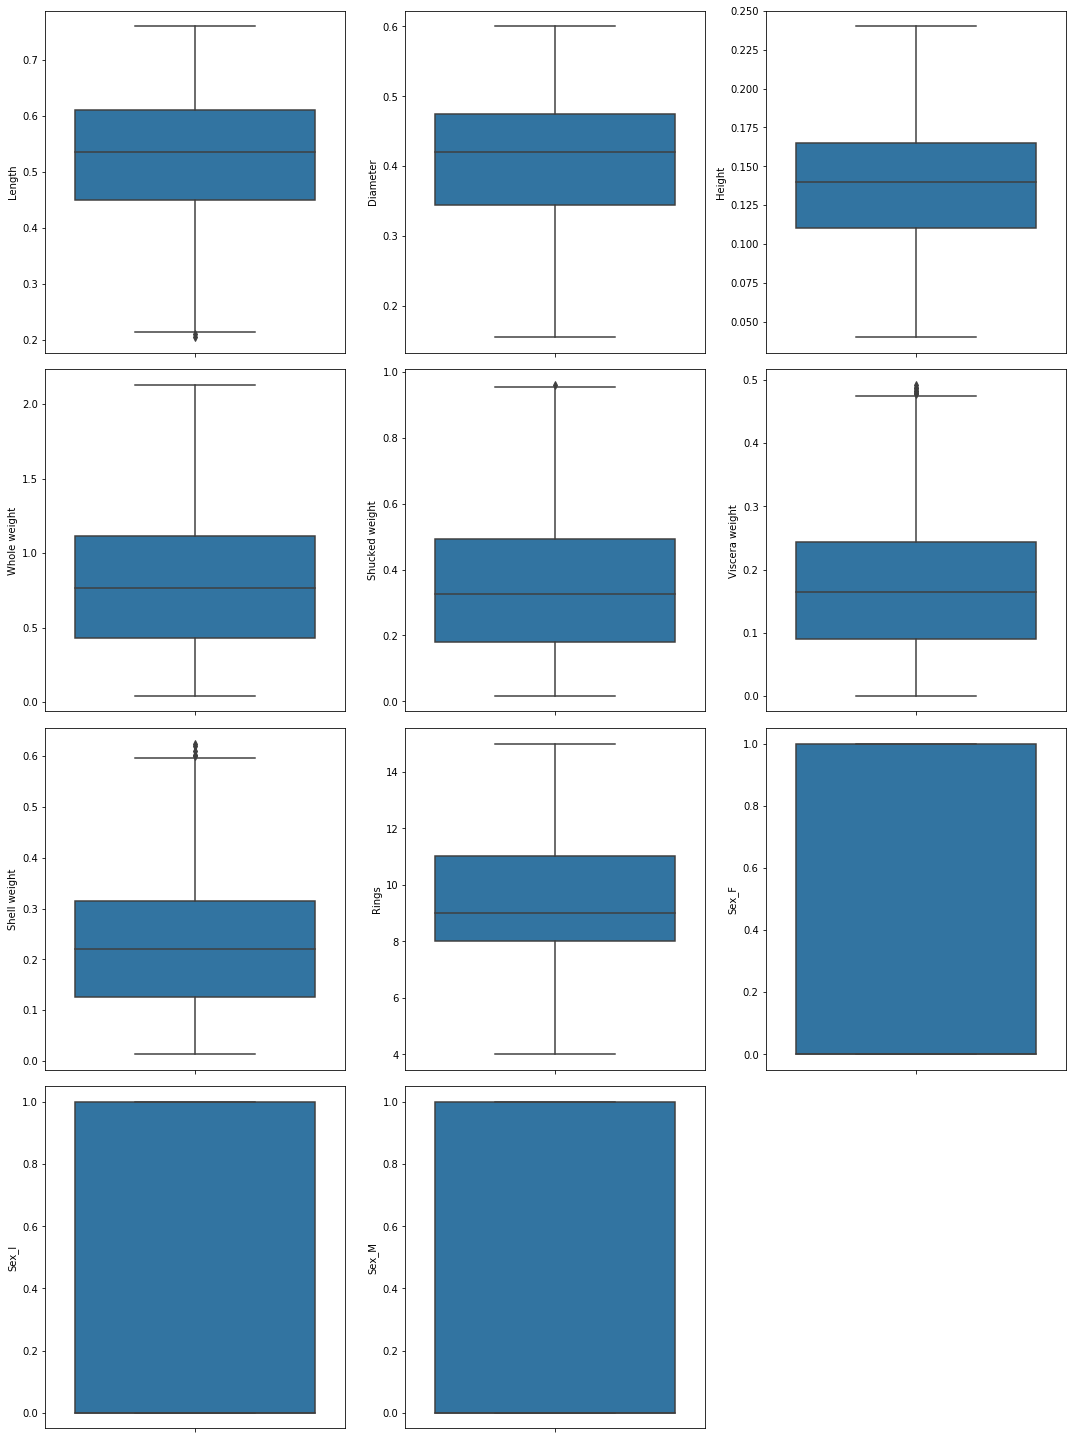

In [195]:
plt.figure(figsize= (15,30))


for i,el in enumerate(new_df.columns):
    plt.subplot(6,3,i + 1)
    sns.boxplot(y=el,data=new_df)
                
                

plt.tight_layout() 

plt.show()

### Observation
1.) We observe that the all the outliers are removed now

### Transforming and scaling dataset

In [196]:
## using the power transformer to remove the skewness

import warnings
warnings.filterwarnings('ignore')

power = PowerTransformer()
for i in new_df.columns:
    if np.abs(new_df[i].skew()) > 0.5:
        new_df[[i]] = power.fit_transform(new_df[[i]])

In [197]:
### checking the skewness between old and new dataset

print(df.skew())
print('*' * 60)
print(new_df.skew())

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
Sex_F             0.807302
Sex_I             0.765708
Sex_M             0.557390
dtype: float64
************************************************************
Length           -0.495017
Diameter         -0.481941
Height           -0.152640
Whole weight      0.345472
Shucked weight    0.455297
Viscera weight    0.454848
Shell weight      0.342490
Rings             0.269205
Sex_F             0.838224
Sex_I             0.706546
Sex_M             0.584953
dtype: float64


### Observation
1.) We can observe skewness of the dataset has reduced

In [198]:
## scaling the dataset using standard scaler

target_col = 'Rings'

X = new_df.drop(columns=[target_col])
y = new_df.loc[:,target_col]

In [234]:
# using standard scaler to scale dataset


scale = StandardScaler()
scaled_data = scale.fit_transform(X)

In [235]:
scaled_data

array([[-0.59228256, -0.4334138 , -1.19900246, ..., -0.66526624,
        -0.70738732,  1.33422152],
       [-1.53396915, -1.51734248, -1.34064554, ..., -0.66526624,
        -0.70738732,  1.33422152],
       [ 0.08035071,  0.16274698, -0.06585785, ...,  1.5031576 ,
        -0.70738732, -0.74950073],
       ...,
       [ 0.70814176,  0.75890775,  1.91714522, ..., -0.66526624,
        -0.70738732,  1.33422152],
       [ 0.93235285,  0.86730062,  0.35907138, ...,  1.5031576 ,
        -0.70738732, -0.74950073],
       [ 1.69467056,  1.6260507 ,  1.63385907, ..., -0.66526624,
        -0.70738732,  1.33422152]])

In [201]:
## we can observe the data got scaled from -2 to 2 range
pd.DataFrame(scaled_data).describe()

,0,1,2,3,4,5,6,7,8,9
count,3.781000e+03,3.781000e+03,3.781000e+03,3.781000e+03,3.781000e+03,3.781000e+03,3.781000e+03,3.781000e+03,3.781000e+03,3.781000e+03
mean,-2.669116e-16,-2.601581e-16,-5.602501e-17,2.760142e-17,-5.109199e-17,2.921052e-16,3.180623e-16,3.240818e-16,8.497713e-17,-1.437036e-16
std,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00
min,-2.834393e+00,-2.709664e+00,-2.757076e+00,-1.685906e+00,-1.624176e+00,-1.711295e+00,-1.735065e+00,-6.652662e-01,-7.073873e-01,-7.495007e-01
25%,-6.371248e-01,-6.501995e-01,-7.740732e-01,-8.076708e-01,-8.181966e-01,-8.229332e-01,-8.230674e-01,-6.652662e-01,-7.073873e-01,-7.495007e-01
50%,1.251929e-01,1.627470e-01,7.578523e-02,-5.762881e-02,-1.006785e-01,-9.743807e-02,-4.949774e-02,-6.652662e-01,-7.073873e-01,-7.495007e-01
75%,7.978262e-01,7.589078e-01,7.840006e-01,7.317707e-01,7.102152e-01,6.922165e-01,7.200006e-01,1.503158e+00,1.413653e+00,1.334222e+00
max,2.143093e+00,2.113819e+00,2.908647e+00,3.003262e+00,3.010205e+00,3.140146e+00,3.248352e+00,1.503158e+00,1.413653e+00,1.334222e+00


In [227]:
df_scaled = pd.DataFrame(scaled_data,columns=new_df.drop(columns=['Rings']).columns)

In [228]:
df_scaled.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,-0.592283,-0.433414,-1.199002,-0.625502,-0.604416,-0.719291,-0.619496,-0.665266,-0.707387,1.334222
1,-1.533969,-1.517342,-1.340646,-1.274339,-1.218729,-1.237502,-1.270924,-0.665266,-0.707387,1.334222
2,0.080351,0.162747,-0.065858,-0.258914,-0.447151,-0.319528,-0.130926,1.503158,-0.707387,-0.749501
3,-0.726809,-0.433414,-0.349144,-0.621004,-0.648646,-0.590972,-0.578782,-0.665266,-0.707387,1.334222
4,-1.713338,-1.625735,-1.623932,-1.320443,-1.267874,-1.326338,-1.393066,-0.665266,1.413653,-0.749501


In [166]:
## using pca to remove multicolinearity 

## we will reduce the dimensionality to 5
len(new_df.columns) - 6

2

In [218]:
scaled_data

array([[-0.59228256, -0.4334138 , -1.19900246, ..., -0.66526624,
        -0.70738732,  1.33422152],
       [-1.53396915, -1.51734248, -1.34064554, ..., -0.66526624,
        -0.70738732,  1.33422152],
       [ 0.08035071,  0.16274698, -0.06585785, ...,  1.5031576 ,
        -0.70738732, -0.74950073],
       ...,
       [ 0.70814176,  0.75890775,  1.91714522, ..., -0.66526624,
        -0.70738732,  1.33422152],
       [ 0.93235285,  0.86730062,  0.35907138, ...,  1.5031576 ,
        -0.70738732, -0.74950073],
       [ 1.69467056,  1.6260507 ,  1.63385907, ..., -0.66526624,
        -0.70738732,  1.33422152]])

In [202]:
pca = PCA(n_components=5)
pca.fit(scaled_data)

x_pca = pca.transform(scaled_data)

In [203]:
## visualizing the pca dataset
df_pca=pd.DataFrame(x_pca,columns=['Feature_'+str(i) for i  in range(0,5)])


In [204]:
df_pca

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4
0,-1.493151,1.552284,-1.140768,-0.342201,0.482997
1,-3.155986,1.583283,-1.695388,-0.234649,-0.175635
2,-0.044924,-1.460666,-1.161556,0.345457,0.357325
3,-1.198355,1.538863,-1.080515,0.199286,-0.063514
4,-4.220406,-0.214071,0.447727,-0.391212,-0.208871
...,...,...,...,...,...
3776,1.317104,-1.488036,-0.746302,0.350485,-0.128269
3777,1.113592,1.502249,-0.308584,-0.291156,0.371476
3778,2.700363,1.459992,0.136320,0.615607,-0.721905
3779,2.171271,-1.490142,-0.429330,-0.334504,0.381120


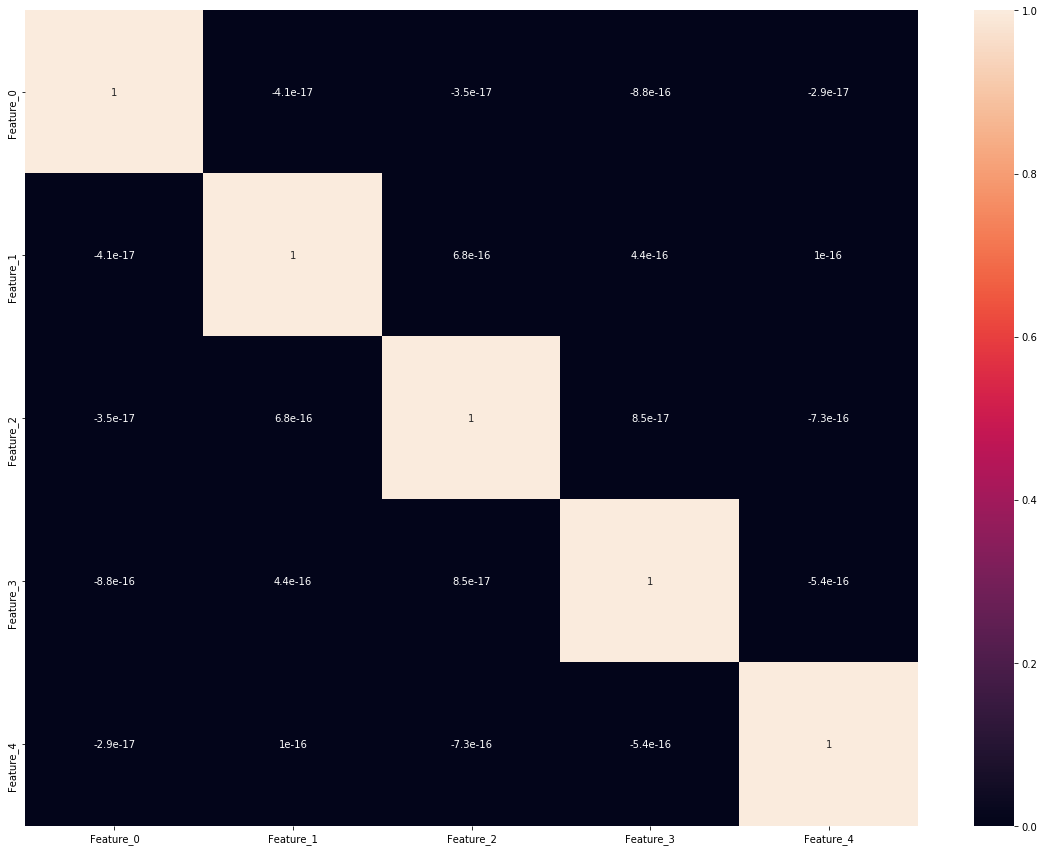

In [205]:
sns.heatmap(df_pca.corr(),annot=True)

### Observation

1.) As we can observe that after using pca the multicolinearity is removed from dataset

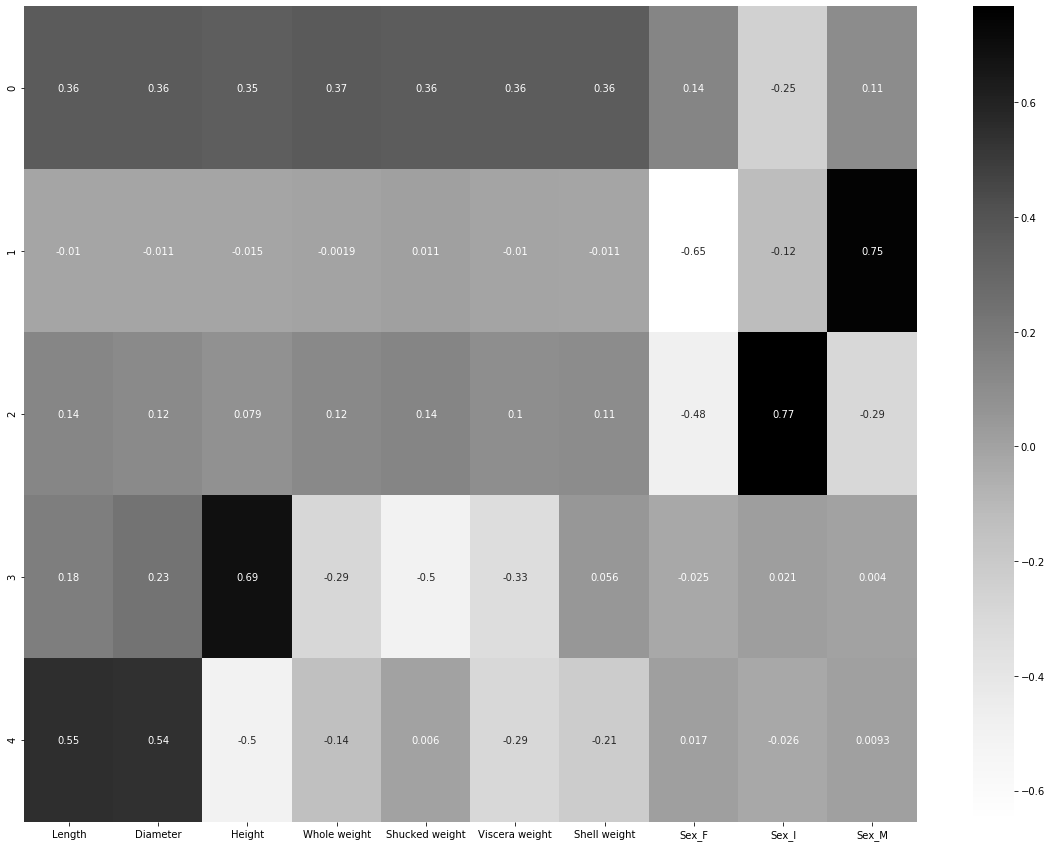

In [206]:
### checking pca components


df_comp =pd.DataFrame(pca.components_,columns=new_df.drop(columns=[target_col]).columns)
sns.heatmap(df_comp,cmap='Greys',annot=True)

In [209]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 3781, dtype: int64

In [210]:
## splitting the data into train and test

x_train, x_test, y_train, y_test = train_test_split(df_pca, y, random_state=44, test_size=0.2)

In [229]:
### scaled df test

x_train, x_test, y_train, y_test = train_test_split(df_scaled, y, random_state=44, test_size=0.2)

In [230]:
x_train

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
1737,0.887511,0.867301,0.500714,0.533859,0.380943,0.568833,0.886929,-0.665266,-0.707387,1.334222
1120,0.080351,0.108551,-0.207501,-0.220681,0.211393,-0.620584,-0.481068,-0.665266,1.413653,-0.749501
2795,0.528773,0.271140,-0.349144,0.268476,0.484148,0.331937,-0.855639,-0.665266,-0.707387,1.334222
2104,1.156564,1.517658,0.642358,1.012896,0.685643,1.205492,2.067640,-0.665266,-0.707387,1.334222
2635,0.887511,0.758908,1.633859,1.273780,1.209038,1.605255,1.208571,-0.665266,-0.707387,1.334222
...,...,...,...,...,...,...,...,...,...,...
571,-1.758180,-1.679932,-1.623932,-1.385664,-1.415309,-1.365821,-1.327923,-0.665266,1.413653,-0.749501
1197,0.842668,0.813104,1.067287,0.732895,0.484148,1.437453,0.601929,-0.665266,-0.707387,1.334222
2801,-1.982391,-2.005110,-2.048861,-1.503737,-1.417767,-1.459592,-1.584423,-0.665266,1.413653,-0.749501
3491,-0.412914,-0.379217,-0.349144,-0.308392,-0.400463,-0.013537,-0.334497,-0.665266,-0.707387,1.334222


In [211]:
x_train

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4
1737,1.893106,1.476023,-0.080594,0.232166,0.301599
1120,-0.932488,-0.276155,1.520840,0.074982,0.466374
2795,0.474987,1.522671,-0.495117,-0.550152,0.685430
2104,3.216253,1.446666,0.335645,0.097341,0.228221
2635,3.306301,1.454351,0.342313,0.040371,-0.792770
...,...,...,...,...,...
571,-4.323538,-0.214856,0.409310,-0.303259,-0.257084
1197,2.374873,1.464006,0.046341,0.191356,-0.253817
2801,-4.841636,-0.198544,0.255550,-0.659682,-0.245606
3491,-0.565452,1.528635,-0.874274,-0.121428,-0.122373


### Model Training

In [231]:
import warnings
warnings.filterwarnings('ignore')

model_list = [
    DecisionTreeClassifier(),
    LogisticRegression(multi_class='multinomial', solver='lbfgs'),
    KNeighborsClassifier(n_neighbors=1),
    SVC(random_state=42, gamma="auto"),
    GaussianNB(),
    RandomForestClassifier(n_estimators=100, random_state=42),
    AdaBoostClassifier(n_estimators=100),
    GradientBoostingClassifier(n_estimators=100),
    XGBClassifier()
]

index_list = ['DT','LR','KNN','SVC','NB','RF','ADB','GBC','XGB']


def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)




def best_fit_model(models,x_train,x_test,y_train,_y_test):
    accuracy_scores = []
    cv_scores= []
    roc_auc_scores = []
   
    for m in models:
        m.fit(x_train,y_train)
        y_pred = m.predict(x_test)
        accuracy_scores.append(accuracy_score(y_test,y_pred))
        cv_scores.append(np.mean(cross_val_score(m,X,y,cv=5,scoring='accuracy')))
        roc_auc_scores.append(multiclass_roc_auc_score(y_test, y_pred))
    df = pd.DataFrame(list(zip(accuracy_scores,cv_scores,roc_auc_scores)),index=index_list,columns=['Accuracy','CV_Score','ROC_AUC_SCORE'])
    df['Score_Diff'] = df['Accuracy'] - df['CV_Score']
    return df

best_df =best_fit_model(model_list,x_train,x_test,y_train,y_test)

[11:33:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:33:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:33:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:33:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [232]:
best_df

,Accuracy,CV_Score,ROC_AUC_SCORE,Score_Diff
DT,0.214003,0.206565,0.556972,0.007438
LR,0.298547,0.273215,0.576656,0.025332
KNN,0.236460,0.218472,0.563241,0.017988
SVC,0.270806,0.252581,0.547510,0.018225
NB,0.244386,0.230115,0.578052,0.014271
RF,0.273448,0.265022,0.575236,0.008425
ADB,0.141347,0.162907,0.568603,-0.021560
GBC,0.276090,0.277717,0.584308,-0.001627
XGB,0.268164,0.257876,0.584975,0.010287


In [213]:
best_df

,Accuracy,CV_Score,ROC_AUC_SCORE,Score_Diff
DT,0.211361,0.210797,0.552984,0.000563
LR,0.282695,0.273215,0.566903,0.009480
KNN,0.228534,0.218472,0.556786,0.010062
SVC,0.282695,0.252581,0.562495,0.030114
NB,0.276090,0.230115,0.588088,0.045975
RF,0.269485,0.265022,0.564896,0.004462
ADB,0.262880,0.162907,0.556753,0.099972
GBC,0.240423,0.277982,0.550405,-0.037559
XGB,0.247028,0.257876,0.556385,-0.010849


### Observation

1. The accuracy scores are too less due to class imbalnce in target feature, can be increased by binning the classes.
2. The accuracy can also be increased by dropping some classes.
3. Best Accuracy given by logistic regression and SVC.

### Save model as pickle file


In [ ]:
joblib.dump(lr,'wine_quality_rf.pk')